# Classificação Multiclasse de Vinhos 🍷

Este notebook implementa uma rede neural artificial do zero para classificar a qualidade de vinhos (tinto e branco) com base em atributos fisico-químicos. O modelo é treinado usando apenas NumPy e permite customizar a arquitetura da rede e função de ativação.

In [1]:
!pip install numpy matplotlib pandas scikit-learn seaborn imblearn


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import sys
import os
import numpy as np


# Adiciona o caminho para importar módulos
sys.path.append(os.path.abspath("../src"))

from classification_multiclass.data_loader import WineQualityDataLoader
from classification_multiclass.wine_classifier import WineQualityClassifier

print("✅ Módulos carregados com sucesso.")

✅ Módulos carregados com sucesso.


In [3]:
loader = WineQualityDataLoader()
X_train, X_test, y_train, y_test, y_all = loader.load_and_prepare_data()
print("✅ Dados carregados.")
print(f"📐 Formato dos dados de treino: {X_train.shape}")
print(f"📐 Formato dos dados de teste: {X_test.shape}")

✅ Dados carregados e preparados com sucesso.
🔢 Total de amostras: 6497 | Treino: 4547 | Teste: 1950
✅ Dados carregados.
📐 Formato dos dados de treino: (4547, 11)
📐 Formato dos dados de teste: (1950, 11)


In [38]:
# 📊 Verificando o número de classes nos dados de treino
num_classes = len(np.unique(y_train))
print("Número de classes detectado:", num_classes)

# 🧩 Obtendo o número de features (entradas)
input_dim = X_train.shape[1]

# 🧠 Definindo a arquitetura da rede com função de ativação por camada
layers = [
    {"neurons": input_dim, "activation": "relu"},      # Entrada
    {"neurons": 128, "activation": "tanh"},            # Oculta 1
    {"neurons": 64, "activation": "relu"},             # Oculta 2
    {"neurons": 32, "activation": "tanh"},             # Oculta 3
    {"neurons": num_classes, "activation": "softmax"}  # Saída
]

# 🚀 Inicialização do modelo com arquitetura personalizada
model = WineQualityClassifier(layers=layers)
print("🧠 Modelo inicializado com arquitetura personalizada.")

Número de classes detectado: 7
🧠 Modelo inicializado com arquitetura personalizada.


In [39]:
print("🧪 Iniciando treinamento...")
losses = model.train(X_train, y_train, epochs=1000, learning_rate=0.01)
print("✅ Treinamento concluído.")

🧪 Iniciando treinamento...
Época 0 - Perda: 19.5393
Época 100 - Perda: 1.7416
Época 200 - Perda: 1.4330
Época 300 - Perda: 1.3357
Época 400 - Perda: 1.2992
Época 500 - Perda: 1.2846
Época 600 - Perda: 1.2786
Época 700 - Perda: 1.2761
Época 800 - Perda: 1.2750
Época 900 - Perda: 1.2746
✅ Treinamento concluído.


In [40]:
print("📊 Avaliando modelo...")
results = model.evaluate(X_test, y_test)

print(f"✅ Acurácia: {results['accuracy']:.4f}")
print("📘 Métricas por classe:")
for cls, metrics in results['metrics_per_class'].items():
    print(f"Classe {cls}: {metrics}")

📊 Avaliando modelo...
✅ Acurácia: 0.4364
📘 Métricas por classe:
Classe 0: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 9}
Classe 1: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 65}
Classe 2: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 642}
Classe 3: {'precision': np.float64(0.4364), 'recall': np.float64(1.0), 'f1-score': np.float64(0.6076), 'support': 851}
Classe 4: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 324}
Classe 5: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 58}
Classe 6: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 1}


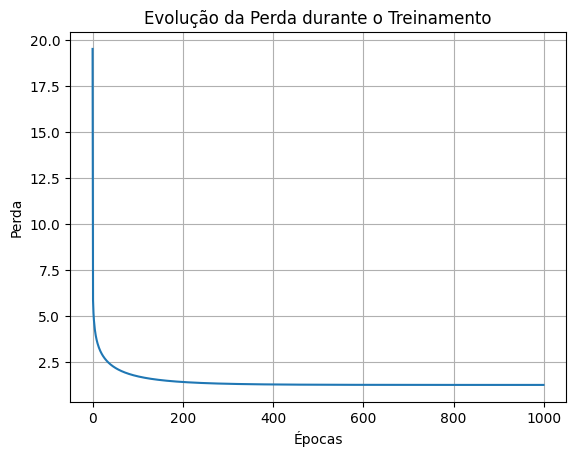

In [41]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.title("Evolução da Perda durante o Treinamento")
plt.grid(True)
plt.show()

In [42]:
results = model.evaluate(X_test, y_test)

print(f"✅ Acurácia: {results['accuracy']:.4f}")

✅ Acurácia: 0.4364


/Users/vanessacunha/Documents/Estudo/UFSC/2025.1/Aprendizado de máquina/projeto-final-INE5664/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


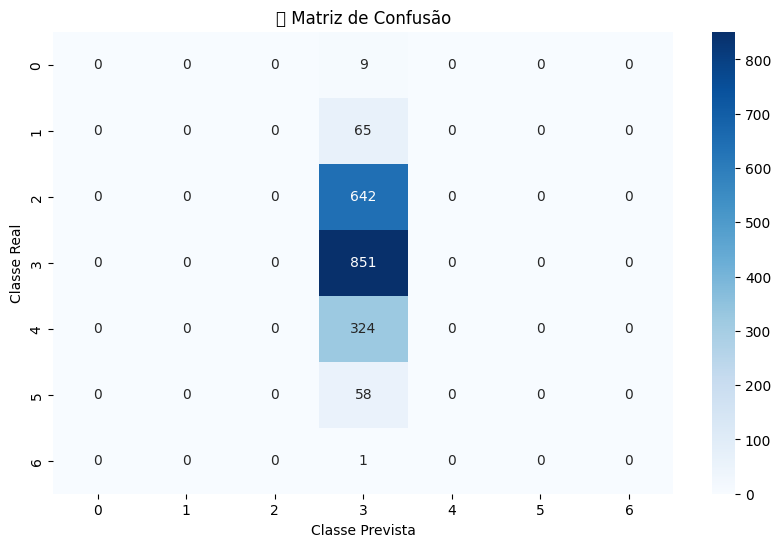

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = results["confusion_matrix"]
labels = results["class_labels"]

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("🔍 Matriz de Confusão")
plt.show()